# DNA Expression Microarrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from ml_datasets.esl import NCI

In [2]:
nci = NCI(verbose=0)
df, label = nci.load()

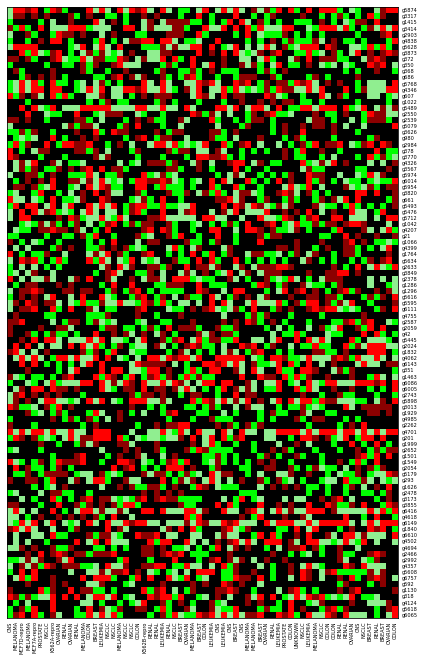

In [3]:
matrix = df.values
col_names = df.columns
rows =  np.arange(matrix.shape[0])
cols = np.arange(matrix.shape[1])
np.random.seed(3)
np.random.shuffle(rows)
np.random.shuffle(cols)

matrix = matrix[:, cols[:100]].T
matrix = matrix[:, rows]
col_names = col_names[cols[:100]]
label = label[rows]
mat_min = np.min(matrix)
mat_max = np.max(matrix)
mat_min = -np.max([np.abs(mat_min), mat_max])
mat_max = np.max([np.abs(mat_min), mat_max])
matrix = np.ma.masked_where(np.abs(matrix) <= 0.3, matrix)

plt.figure(figsize=(6, 12))
cmap_list = ["red", "darkred", "green", "lime", "lightgreen"]
cmap = LinearSegmentedColormap.from_list("Custom cmap", cmap_list, len(cmap_list))
cmap.set_bad("black")

bounds = np.linspace(mat_min + 6, mat_max - 6, 5)  # np.arange(mat_min + 6, mat_max - 6, 0.1)
idx = np.searchsorted(bounds, 0)

bounds = np.insert(bounds, idx, 0)
norm = BoundaryNorm(bounds, cmap.N)

plt.imshow(matrix, cmap=cmap, norm=norm)
plt.xticks(np.arange(len(label)))
plt.yticks(np.arange(len(col_names)))
ax = plt.gca()
ax.set_xticklabels(label, rotation=90)
ax.set_yticklabels(col_names)
ax.yaxis.tick_right()
ax.tick_params(axis=u"both", which=u"both", labelsize=5, length=0.0)
plt.tight_layout()
fig = plt.gcf()
# fig.set_size_inches((6, 12), forward=False)
fig.savefig("img/dna.png", dpi=200)
plt.show()